# Проект урока 5. Продвинутые расчеты и визуализация
#  «Аналитика клиентов и логов gamedev-стартапа»

## Шаг 1

В этом проекте вы будете работать в роли аналитика gamedev-стартапа, который вывел на рынок простую игру: в приложении пользователь пытается угадать ответы на предлагаемые вопросы. Набор данных состоит из двух датасетов: user_data и logs.

**Описание данных:**

user_data:

- client – идентификатор пользователя  
- premium – есть ли у клиента премиум статус  
- age – возраст  

logs:

- client – идентификатор пользователя  
- success – результат ответа (операции): успех - 1, нет - 0  
- platform – платформа  
- time – время в формате Unix

Вы можете решать задания тем способом, который считаете наиболее удобным или оптимальным. А для того, чтобы лучше понять задание, следуйте по шагам выполнения. Бывает, что их можно выполнить в одну строчку, применяя методы друг за другом. А если выполняете шаги отдельно, не забудьте сохранить результат в переменную и в следующем шаге работать именно с ней.

В ноутбуке место для вашего решения обозначено комментарием `# Ваш код здесь`, но вы можете писать код где вам удобно, добавлять или удалять ячейки с кодом или текстом по вашему усмотрению.

Кроме того можно посмотреть подсказки, кликнув на строчку `► Нажмите сюда, чтобы увидеть подсказку`. Также не забывайте о наличии конспектов и возможности задать вопрос в Discord, ссылка на нужный тред есть на странице каждого шага в LMS

## Шаг 2

Начните с того, что загрузите данные и исследуйте основную информацию о них. **Проверьте, сколько пустых значений в датафрейме `user_data`.**

Шаги выполнения:

1. Импортируйте библиотеку pandas

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>Для импорта библиотеки напишите

```python
import library as shortcut
```

где вместо `library` подставьте название библиотеки (pandas), а вместо `shortcut` — его общераспространённое сокращённое название (pd)</p>
</details>

In [2]:
import pandas as pd



2. Загрузите два csv файла к уроку в свою папку в JupyterНub
3. Прочитайте эти датасеты, результаты сохранив в соответствующие переменные `user_data` и `logs`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Датасеты находятся в файлах формата CSV. Для их чтения воспользуйтесь функцией `pd.read_csv()`, передав в качестве аргумента путь к файлу. Например,
```python
df = pd.read_csv('data.csv')
```
cчитает файл `data.csv`, хранящийся в той же папке, что и юпитер ноутбук, в котором вы сейчас работаете.
</p>
</details>

In [3]:
user_data = pd.read_csv('5_user_data.csv')
logs = pd.read_csv('5_logs.csv')



4. Узнайте основную информацию о данных: посмотрите на содержимое датафреймов, проверьте размер каждой загруженной таблицы, ознакомьтесь с типами данных, взгляните на описательную статистику по колонкам

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как посмотреть на содержимое датафреймов?** Используйте метод `head()`

**Как проверить размер датафрейма?** Используйте атрибут `shape`, чтобы узнать количество строк и столбцов. Этот атрибут возвращает кортеж, первый элемент которого указывает на количество строк, а второй — на количество столбцов в датафрейме.  

**Как узнать типы данных?** Есть два способа :
      
1) Используйте атрибут `dtypes`. Он возвращает серию, индексами которой являются названия столбцов, а значениями — тип данных в этих столбцах.  
      
2) Либо примените к датафрейму метод `info()`, который выводит подробную информацию о датафрейме и его колонках.    

**Как получить описательную статистику по столбцам?** Используйте метод `describe()`, который возвращает описательную статистику числовых переменных (среднее, минимум, максимум и так далее).
      
**Как обратиться к атрибуту датафрейма?** Для этого нужно написать переменную, где хранится датафрейм, поставить точку и написать название атрибута (без скобок!). Например:
```python
df.some_attribute
```
так мы обратимся к атрибуту `some_attribute` у датафрейма в переменной `df`
      
**Как использовать метод?** Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
</p>
</details>

In [4]:
user_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [5]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [6]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [7]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


5. Определите, сколько пустых значений в датафрейме `user_data`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Используйте метод `info()`, чтобы узнать, есть ли пустые значения в колонках и сколько их.
      
**Как использовать метод?** Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
      
Посмотрите на значение в столбце `Non-Null Count` - он говорит о том, сколько **не пустых** значений есть в каждой колонке. Если это число совпадает с количеством строк всего датафрейма - пустых значений нет. А если строк во всем датафрейме больше, чем это число - то пустые значения в этой колонке есть и количество их равно разнице между числом строк всего датафрейма и числом не пустых строк в этой колонке
</p>
</details>

In [8]:
# Ваш код здесь



## Шаг 3

Ваш стартап планирует выбрать амбассадоров продукта, чтобы через них продвигать игру. Для этого менеджер хочет встретиться с наиболее активными клиентами, которые дают больше других верных ответов. А ваша задача — выявить таких клиентов.

**Определите, какой клиент или клиенты дали наибольшее количество успешных ответов. Перечислите их идентификаторы (см.колонку `client`) через запятую и пробел в порядке возрастания**. Например:

`12, 123, 456`

Шаги выполнения:
1. Отберите из данных только те ответы, которые были успешными. Это значит, что вам надо найти все строки, где значение в столбце `success` датафрейма `logs` равно `True`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Чтобы отобрать только нужные записи, есть два способа:

1) Используйте аксессор `loc[]`, внутри которого напишите условие, что значение в столбце `success` датафрейма `logs` равно `True`.

Как использовать аксессор? Например, код
```python
df.loc[df["col_1"] > 35]
```
вернет только те строки датафрейма `df`, где значения в колонке `col_1` больше 35.

2) Используйте метод `query()`, внутри которого напишите строку с условием, что значение в столбце `success` датафрейма `logs` равно `True`. Учтите, что условие нужно писать в кавычках, а название колонки — без кавычек.

Как использовать метод? Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
      
Помните, что один знак равно означает присвоение, а два — проверку на равенство.
      
</p>
</details>

In [9]:
logs.query('success == True')



,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
5,41928,True,phone,1585446772
...,...,...,...,...
4493,92584,True,computer,1585408896
4494,95152,True,computer,1585420263
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121


2. Подсчитайте количество успешных ответов для каждого клиента

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте метод `value_counts()`, применив его к столбцу `client` на отобранных данных (где остались только успешные ответы). Этот метод возвращает серию, где индексы — это уникальные значения из столбца, а значения — это частота их встречаемости.

Как использовать метод? Например применим метод `some_method()` к колонке `column_name` датафрейма `df`:
```python
df.column_name.some_method()
```

</p>
</details>

In [10]:
logs.query('success == True').client.value_counts()



36165    41
61468    41
12179    41
61473    41
78349    41
         ..
36194     1
57752     1
84618     1
53228     1
36864     1
Name: client, Length: 2845, dtype: int64

3. Определите максимальное число успешных ответов в этих данных

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте метод `max()`, применив его к результату прошлого шага, где в значениях - число успешных ответов у каждого клиента, а в индексе - идентификаторы клиентов. Этот метод возвращает максимальное значение. Не путайте его с уже знакомым вам методом `idxmax()`, который возвращает индекс максимального значения (только один), а не само значение.

Как использовать метод? Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
</p>
</details>

In [11]:
number = logs.query('success == True').client.value_counts().max()



4. Оставьте только записи о том клиенте или тех клиентах, которые дали максимальное число успешных ответов

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Работайте с тем агрегированным датафреймом, который получили на втором шаге выполнения этого задания.**
      
**Используйте аксессор `loc[]`**, внутри которого напишите условие, что количество успешных ответов для каждого клиента равно максимальному числу.

**Как использовать аксессор?** Например, код
```python
series.loc[series > number]
```
вернет только те строки пандасовской серии `series`, где значения в ней больше, чем число в переменной `number`.
      
Помните, что один знак равно означает присвоение, а два — проверку на равенство.
      
**Если на втором шаге выполнения этого задания у вас получилась не серия, а датафрейм, и вы хотите фильтровать с помощью `query`**, перед названием переменной с максимальным числом успешных ответов поставьте `@`. Например:
```python
df.query('col_1 > @number')
```      
</p>
</details>

In [12]:
logs.query('success == True').client.value_counts().loc[logs.query('success == True').client.value_counts() == number]



36165    41
61468    41
12179    41
61473    41
78349    41
28719    41
92584    41
52870    41
82563    41
Name: client, dtype: int64

5. Получите идентификатор(ы) такого клиента / таких клиентов. Если их несколько — отсортируйте идентификаторы по возрастанию. Скопируйте получившийся результат, без скобок

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Чтобы получить идентификаторы клиентов**, возьмите индексы получившейся series, обратившись к атрибуту `index`.
      
**Как обратиться к атрибуту датафрейма?** Для этого нужно написать переменную, где хранится датафрейм, поставить точку и написать название атрибута (без скобок!). Например:
```python
df.some_attribute
```
так мы обратимся к атрибуту `some_attribute` у датафрейма в переменной `df`.       
      
**Чтобы отсортировать идентификаторы, используйте метод `sort_values()`**. Если хотите отсортировать серию по значениям в индексе, перед сортировкой обратитесь к атрибуту `index`. Например,

```python
series.index.sort_values()
```
отсортирует `series` по индексам.

Помните, что параметр `ascending` отвечает за сортировку по возрастанию (True - по возрастанию, False - по убыванию).    

</p>
</details>

In [13]:
logs.query('success == True'). \
    client.value_counts(). \
    loc[logs.query('success == True').client.value_counts() == number] \
    .index \
    .sort_values()



Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64')

## Шаг 4

Команда стартапа хочет развивать свою игру, но имеет ограниченные ресурсы, поэтому решила определиться, с какой платформы стоит начать. **Выясните, с какой платформы было дано наибольшее количество успешных ответов**

Шаги выполнения:
1. Как и в предыдущем задании, отберите из данных только те ответы, которые были успешными

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Чтобы отобрать только нужные записи, есть два способа:

1) Используйте аксессор `loc[]`, внутри которого напишите условие, что значение в столбце `success` датафрейма `logs` равно `True`.

Как использовать аксессор? Например, код
```python
df.loc[df["col_1"] > 35]
```
вернет только те строки датафрейма `df`, где значения в колонке `col_1` больше 35

2) Используйте метод `query()`, внутри которого напишите строку с условием, что значение в столбце `success` датафрейма `logs` равно `True`. Учтите, что условие нужно писать в кавычках, а название колонки — без кавычек.

Как использовать метод? Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
      
Помните, что один знак равно означает присвоение, а два — проверку на равенство
      
</p>
</details>

In [14]:
logs.query('success == True')



,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
5,41928,True,phone,1585446772
...,...,...,...,...
4493,92584,True,computer,1585408896
4494,95152,True,computer,1585420263
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121


2. Подсчитайте количество успешных ответов с каждой платформы

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте метод `value_counts()`, применив его к столбцу `platform` на отобранных данных (где остались только успешные ответы). Этот метод возвращает серию, где индексы — это уникальные значения из столбца, а значения — это частота их встречаемости.

Как использовать метод? Например применим метод `some_method()` к колонке `column_name` датафрейма `df`:
```python
df.column_name.some_method()
```

</p>
</details>

In [15]:
logs.query('success == True').platform.value_counts()



phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

3. Определите платформу с наибольшим количеством успешных ответов

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте метод `idxmax()`.

Как использовать метод? Например применим метод `some_method()` к колонке `column_name` датафрейма `df`:
```python
df.column_name.some_method()
```
</p>
</details>

In [16]:
logs.query('success == True').platform.value_counts().idxmax()



'phone'

## Шаг 5

Менеджер продукта выдвинул идею, что стоит сфокусироваться не просто на одной платформе, но ещё и только на сегменте премиум. **Определите, какая платформа пользуется наибольшей популярностью среди премиум-клиентов**.

Шаги выполнения:
1. Объедините датафреймы `user_data` и `logs` по колонке `client`, чтобы собрать вместе информацию о статусе клиента и его активности в приложении

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте метод `merge`, чтобы объединить два датафрейма по колонке. Он применяется к первому из двух датафреймов и принимает как параметр второй датафрейм. Также можно указать, по какой колонке объединять и как. Например:

```python
df.merge(other_df, on='same_column', how='inner')
```
где
`other_df` — другой датафрэйм
`on` — параметр, принимающий название общей колонки в двух датафреймах, по которой нужно объединять
`how` — параметр, принимающий тип джойна
То есть тут мы объединили `df` с `other_df` по колонке `same_column` типом джойна `inner` (тип можно не указывать, по умолчанию определен `inner`)
</p>
</details>

In [17]:
df = user_data.merge(logs, on='client')



2. Посмотрите на первые строки получившегося датафрейма, чтобы убедиться, что объединение прошло корректно

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как посмотреть на содержимое датафрейма?** Используйте метод `head()`
      
**Как использовать метод?** Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
</p>
</details>

In [18]:
df.head()



,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


3. Отберите из данных только записи о премиум-клиентах

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Чтобы отобрать только нужные записи, есть 2 способа:

1) Используйте аксессор `loc[]`, внутри которого напишите условие, что значение в столбце `premium` равно `True`.

Как использовать аксессор? Например, код
```python
df.loc[df["col_1"] > 35]
```
вернет только те строки датафрейма `df`, где значения в колонке `col_1` больше 35

2) Используйте метод `query()`, внутри которого напишите строку с условием, что значение в столбце `premium` равно `True`. Учтите, что условие нужно писать в кавычках, а название колонки - без кавычек.

Как использовать метод? Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
      
Помните, что один знак равно означает присвоение, а два - проверку на равенство
      
</p>
</details>

In [19]:
df.query('premium == True')



,client,premium,age,success,platform,time
23,74867,True,27,False,computer,1585452086
24,49379,True,25,False,computer,1585433626
25,88203,True,35,True,phone,1585450059
30,32603,True,20,True,computer,1585473383
52,53182,True,24,True,phone,1585406474
...,...,...,...,...,...,...
3413,52373,True,36,True,phone,1585405142
3415,13688,True,66,True,computer,1585453923
3419,40643,True,22,True,phone,1585413473
3432,53774,True,50,True,phone,1585422804


4. Подсчитайте количество ответов премиум-клиентов с каждой платформы

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте метод `value_counts()`, применяя его к столбцу `platform` на отобранных данных (где остались только ответы премиум-клиентов). Этот метод возвращает серию, где индексы — это уникальные значения из столбца, а значения — это частота их встречаемости.

Как использовать метод? Например, применим метод `some_method()` к колонке `column_name` датафрейма `df`:
```python
df.column_name.some_method()
```

</p>
</details>

In [20]:
df.query('premium == True').platform.value_counts()



phone       246
computer    150
tablet       24
Name: platform, dtype: int64

5. Определите платформу с наибольшим количеством ответов премиум-клиентов

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте метод `idxmax()`.

Как использовать метод? Применим метод `some_method()` к колонке `column_name` датафрейма `df`:
```python
df.column_name.some_method()
```
</p>
</details>

In [21]:
df.query('premium == True').platform.value_counts().idxmax()



'phone'

## Шаг 6

Самую популярную платформу среди премиум-клиентов определили, но менеджер хочет посмотреть, насколько она более востребованная, чем остальные платформы. Сравнивать числа удобнее не в таблице, а на графике. **С помощью модуля `pyplot` библиотеки `matplotlib` постройте график, демонстрирующий количество ответов премиум-клиентов на каждой платформе**. Выберите наиболее похожий график на тот, что получился у вас.  
*Если на графике не видны значения на осях, используйте светлую тему в JupyterHub или посмотрите графики на LMS*

A
![A](https://storage.yandexcloud.net/klms-public/production/learning-content/455/4133/35503/98839/469654/A.png)

B
![B](https://storage.yandexcloud.net/klms-public/production/learning-content/455/4133/35503/98839/469654/B.png)

C
![C](https://storage.yandexcloud.net/klms-public/production/learning-content/455/4133/35503/98839/469654/C.png)

Шаги выполнения:
1. Как и в прошлом шаге, отберите из данных только записи о премиум-клиентах и подсчитайте количество их ответов для каждой платформы

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Чтобы отобрать только нужные записи, есть два способа:**

1) Используйте аксессор `loc[]`, внутри которого напишите условие, что значение в столбце `premium` равно `True`.

Как использовать аксессор? Например, код
```python
df.loc[df["col_1"] > 35]
```
вернет только те строки датафрейма `df`, где значения в колонке `col_1` больше 35.

2) Используйте метод `query()`, внутри которого напишите строку с условием, что значение в столбце `premium` равно `True`. Учтите, что условие нужно писать в кавычках, а название колонки — без кавычек.

Как использовать метод? Например, применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
      
Помните, что один знак равно означает присвоение, а два — проверку на равенство.
      
**Чтобы посчитать количество ответов для каждой платформы**, используйте метод `value_counts()`, применив его к столбцу `platform` на отобранных данных (где остались только ответы премиум-клиентов). Этот метод возвращает серию, где индексы — это уникальные значения из столбца, а значения — это частота их встречаемости.

Как использовать метод? Применим метод `some_method()` к колонке `column_name` датафрейма `df`:
```python
df.column_name.some_method()
```

      
</p>
</details>

In [22]:
df1 = df.query('premium == True').platform.value_counts()



2. Импортируйте модуль `pyplot` из библиотеки `matplotlib` с общепринятым алиасом `plt`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>Для импорта модуля из библиотеки напишите

```python
import library.module as shortcut
```

где вместо `library` подставьте название библиотеки, вместо `module` - название модуля, а вместо `shortcut` - его общераспространённое сокращённое название</p>
</details>

In [23]:
import matplotlib.pyplot as plt



3. Постройте горизонтальный барплот (столбчатую диаграмму), где по оси y будут названия платформ, а по оси x - количество ответов

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Передайте в функцию `plt.barh()` два параметра:** сначала названия платформ, а потом количество ответов
      
Например:      
```python
plt.barh(df.col_1, df.col_2)
```
нарисует график на основе данных из датафрейма `df`, где по оси y будут идти значения из колонки `col_1`, а по оси x - из `col_2`
      
**Как обратиться к названиям платформ и количеству ответов?** После подсчета количества ответов для каждой платформы, названия платформ должны быть в индексе получившейся серии, а количество ответов - в её значениях. Обратиться к индексу можно с помощью атрибута `index`, а к значениям - с помощью атрибута `values`
      
**Как обратиться к атрибуту серии?** Для этого нужно написать переменную, где хранится серия, поставить точку и написать название атрибута (без скобок!). Например:
```python
series.some_attribute
```
так мы обратимся к атрибуту `some_attribute` у серии в переменной `series`
</p>
</details>

<BarContainer object of 3 artists>

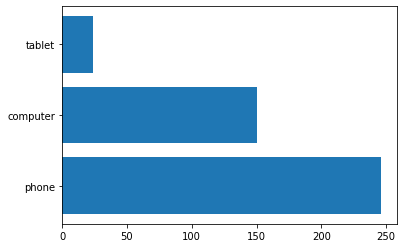

In [24]:
fig, ax = plt.subplots()
ax.barh(df1.index, df1.values)



4. Выберите наиболее похожий график на тот, что получился у вас

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Обратите внимание на значения на осях.
      
Проверьте, что считаете только ответы премиум-клиентов, а для построения графика используете именно функцию plt.bar**h**()
</details>

## Шаг 7

Продожим раскручивать идею о том, что нашей команде стоит сфокусироваться на работе именно с премиум-клиентами. Посмотрите на долю неуспешных ответов от всего количества ответов — отдельно у премиум и обычных клиентов. **У какой категории клиентов доля неуспешных ответов выше?**

Варианты ответа:
- премиум  
- обычные

Шаги выполнения:
1. Сгруппируйте объединенный датафрейм, полученный на прошлом шаге, по категории клиентов (см.колонку `premium`) и успешности ответа (см.колонку `success`), затем посчитайте количество записей для каждой группы

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Сгруппируйте данные одновременно по двум колонкам — `premium` и `success`**, используя метод `groupby()`, и рассчитайте количество записей для каждой группы.
      
**Как сгруппировать по нескольким колонкам?** Передайте в метод `groupby()` не строку-название колонки, а список с названиями колонок. Например:
```python
df.groupby(['col_1', 'col_2'])
```
сгруппирует по комбинации значений `col_1` и `col_2`.
      
**Не забудьте использовать параметр `as_index = False` при группировке, это нам понадобится для следующего шага.**

**После группировки используйте метод `agg()`**, в котором примените агрегирующую функцию `count` к любому столбцу, который не использовали в группировке, в котором нет пропущенных значений — здесь можете использовать столбец `client`. Тогда этот метод посчитает количество записей для каждой группы.

**Как использовать метод `agg()`?** Например, применим его к датафрейму `df` и посчитаем сумму по столбцу `column_name`:
```python
df.agg({'column_name':'sum'})
```

**Как использовать метод `agg()` после группировки?** Используйте цепочку методов, применив их друг за другом. Например:
```python
df.some_method_1().some_method_2()
```      
</p>
</details>
</p>
</details>

In [25]:
df3 = df.groupby(['premium', 'success'], as_index=False).agg({'client' : 'count'}).rename(columns={'client' : 'count_clients'})



In [26]:
df3

,premium,success,count_clients
0,False,False,775
1,False,True,2244
2,True,False,117
3,True,True,303


2. Преобразуйте форму агрегированного датафрейма так, чтобы в строках была категория клиента (премиум или нет), в колонках успешность результата (да или нет), а в значениях — количество записей для каждой группы

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Используйте метод `pivot()`**. В параметр `index` передайте название колонки с категорией клиента, в параметр `columns` - название колонки с успешностью результата, а в параметр `values` - название колонки с количеством записей для каждой группы

**Как использовать метод?** Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```

**Если не получается**, убедитесь, что вы использовали параметр `as_index = False` при группировке
</p>
</details>

In [27]:
df4 = df3.pivot(index='premium', columns='success', values='count_clients')



In [28]:
df4

success,False,True
premium,,
False,775,2244
True,117,303


3. Создайте новую колонку с долей неуспешных ответов от всего количества ответов. Для этого разделите колонку с числом неуспешных ответов на сумму значений из колонок с числом успешных и неуспешных ответов

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Как создать новую колонку?** Достаточно написать такой код:
```python
df['new_column'] = some_value
```
где `df` — датафрейм, `new_column` — название новой колонки, `some_value` — то, чему будет равна колонка (это может быть одно число или колонка датафрейма, где число элементов такое же как число строк в `df`).
      
**Как сложить или разделить значения в двух колонках?** Арифметические операции с пандасовскимии колонками делаются очень просто — прямо как с питоновскими числами. Например, этот код:
```python
df.column1 * df.column2
```
умножит все значения из колонки `column1` датафрейма `df` на соответствующие элементы колонки `column2`. Число элементов в обеих колонках должно быть одинаковым.
      
**Чтобы задать очередность действий** (сложение, а потом деление), используйте скобки.
      
**Чтобы обратиться к колонкам, которые называются `True` или `False`,** напишите эти названия как обычно, в квадратных скобках, но **без кавычек**. Например:
```python
df[True]
```
так мы обратимся к колонке с названием `True` датафрейма `df`
</p>
</details>

In [29]:
df4['percentage'] = df4[False] / (df4[False] + df4[True])


In [30]:
df4

success,False,True,percentage
premium,,,
False,775,2244,0.256708
True,117,303,0.278571


4. Посмотрите на новую колонку: у какой категории клиентов (премиум или обычных) доля неуспешных ответов выше, т.е. в какой строке значение больше?

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Это можно сделать, посмотрев на значения глазами - код здесь не нужен.
      
В строке с индексом `False` будет значение доли для обычных клиентов, а в строке с индексом `True` - для премиум
</p>
</details>

## Шаг 8

У команды всё ещё есть сомнения по поводу работы только с премиум-клиентами. Посмотрим, как возраст премиум-клиентов отличается от возраста обычных. **Для сравнения распределения возраста у премиум и обычных клиентов постройте две гистограммы в одном пространстве, используя функцию `plt.subplot()` из библиотеки `matplotlib`**. В обоих графиках по оси х должен идти возраст, а по оси у - количество клиентов с таким возрастом.

Выберите верные утверждения:  
- премиум-клиентов возраста примерно 35-39 лет больше, чем обычных клиентов этого же возраста
- премиум-клиентов возраста примерно 35-39 лет меньше, чем обычных клиентов этого же возраста
- у премиум-клиентов в каждую категорию возраста (столбец) попадает абсолютно одинаковое количество клиентов
- у обычных клиентов в каждую категорию возраста (столбец) попадает абсолютно одинаковое количество клиентов
- среди премиум-клиентов больше тех, кому примерно 25-30 лет, чем тех, кому примерно 20-25 лет
- среди премиум-клиентов меньше тех, кому примерно 25-30 лет, чем тех, кому примерно 20-25 лет
- у нас чуть больше 40 премиум-клиентов возраста ориентировочно 65-69 лет
- у нас около 400 премиум-клиентов возраста ориентировочно 65-69 лет

Шаги выполнения:
1. Используя функции `plt.subplot()` и `plt.hist()`, постройте два графика, один над другим. Первый должен показывать распределение возраста только премиум-клиентов, а второй - только обычных клиентов

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Для построения первого графика** передайте в функцию `plt.subplot()` три числовых аргумента: количество рядов (в нашем случае их будет 2), количество столбцов (у нас будет 1) и индекс этого графика (для первого графика индекс будет 1). А в функцию `plt.hist()` - данные о возрасте только премиум-клиентов. Для этого отфильтруйте датафрейм по колонке `premium` и обратитесь к колонке `age`.
      
Гистограмма должна показывать по оси у именно **количество** клиентов с таким возрастом, поэтому нормализацию распределения делать не нужно, параметр `density` не задавайте.

**Как сочетать функции `plt.subplot()` и `plt.hist()`?** Задайте на первой строчке функцию `plt.subplot()`, а на второй строчке в этой же ячейке кода - функцию `plt.hist()`
      
**Для построения второго графика** сделайте аналогично, но индекс графика в функции `plt.subplot()` будет 2, а в функцию `plt.hist()` нужно передать данные о возрасте только  обычных клиентов
      
**Весь код построения визуализации пишите в одной ячейке**
   
</p>
</details>

(array([276., 408., 295., 279., 282., 334., 285., 245., 235., 380.]),
 array([20. , 24.9, 29.8, 34.7, 39.6, 44.5, 49.4, 54.3, 59.2, 64.1, 69. ]),
 <a list of 10 Patch objects>)

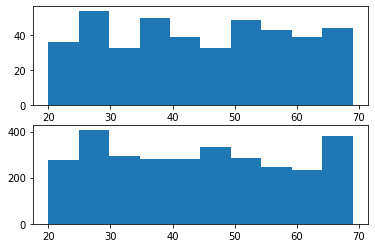

In [40]:
plt.subplot(211)
plt.hist(df.query('premium == True')['age'])
plt.subplot(212)
plt.hist(df.query('premium == False')['age'])


2. Чтобы удобнее было читать графики, добавьте детали: заголовок, подписи осей, сетку и другие элементы по вашему выбору

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Чтобы добавить заголовок,** передайте в функцию `plt.title()` строку с названием графика. Так как у нас два графика, один под другим, то вы можете добавить заголовок только к верхнему графику.
      
**Чтобы добавить подписи осей,** передайте в функцию `plt.ylabel()` строку с названием оси у, а в функцию `plt.xlabel()` строку с названием оси х. В подпись оси у стоит написать категорию клиентов (премиум или обычные), а оси х - переменную, по которой строится распределение (возраст). Так как у нас два графика, один под другим, то вы можете добавить подпись оси х только к нижнему графику.
      
**Чтобы добавить сетку,** передайте в функцию `plt.grid()` значение `True`
      
**Куда писать эти функции?** Под каждой функцией визуализации, на отдельной строчке, но в той же ячейке
</p>
</details>

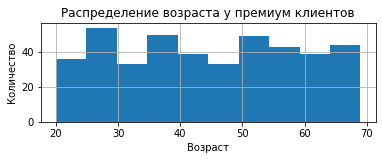

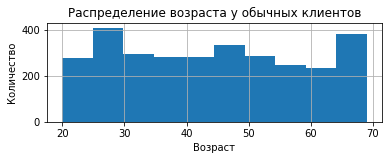

In [49]:
plt.subplot(211)
plt.hist(df.query('premium == True')['age'])
plt.title("Распределение возраста у премиум клиентов")
plt.xlabel("Возраст") 
plt.ylabel("Количество")
plt.grid()
plt.show()
plt.subplot(212)
plt.hist(df.query('premium == False')['age'])
plt.title("Распределение возраста у обычных клиентов")
plt.xlabel("Возраст") 
plt.ylabel("Количество")
plt.grid()
plt.show()

3. Посмотрите на получившийся график и выберите верные утверждения

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Обращайте внимание не только на высоту столбцов, но и на значения по оси у.
      
Помните, что на верхнем графике данные по возрасту премиум-клиентов, а на нижнем - обычных клиентов
</p>
</details>

## Шаг 9

Посмотрев на аналитику по премиум-клиентам, команда стартапа решила всё-таки работать со всеми категориями клиентов и в первую очередь обратить внимание на число успешных и неуспешных ответов. Так ваша работа повлияла на работу всей команды. Но не время останавливаться!

**Постройте график, отражающий распределение количества успешных ответов на пользователя.** По оси `x` должно идти число успешных ответов, а по оси `y` - сколько пользователей дали такое число успешных ответов

**Выберите одно или несколько верных утверждений**

Шаги выполнения:
1. Как и в задании из Шага 3, отберите из данных только те ответы, которые были успешными. Это значит, что вам надо найти все строки, где значение в столбце `success` датафрейма `logs` равно `True`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Чтобы отобрать только нужные записи, есть 2 способа:

1) Используйте аксессор `loc[]`, внутри которого напишите условие, что значение в столбце `success` датафрейма `logs` равно `True`.

Как использовать аксессор? Например, код
```python
df.loc[df["col_1"] > 35]
```
вернет только те строки датафрейма `df`, где значения в колонке `col_1` больше 35

2) Используйте метод `query()`, внутри которого напишите строку с условием, что значение в столбце `success` датафрейма `logs` равно `True`. Учтите, что условие нужно писать в кавычках, а название колонки - без кавычек.

Как использовать метод? Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
      
Помните, что один знак равно означает присвоение, а два - проверку на равенство
      
</p>
</details>

In [50]:
logs.query('success == True')



,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
5,41928,True,phone,1585446772
...,...,...,...,...
4493,92584,True,computer,1585408896
4494,95152,True,computer,1585420263
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121


2. Подсчитайте количество успешных ответов для каждого клиента

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте метод `value_counts()`, применив его к столбцу `client` на отобранных данных (где остались только успешные ответы). Этот метод возвращает серию, где индексы — это уникальные значения из столбца, а значения — это частота их встречаемости.

Как использовать метод? Например применим метод `some_method()` к колонке `column_name` датафрейма `df`:
```python
df.column_name.some_method()
```

</p>
</details>

In [53]:
ser = logs.query('success == True').client.value_counts()



3. Чтобы не запутаться в значениях, переименуйте получившуюся серию - сейчас колонка в ней называется `client`, хотя в ней число успешных ответов

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Для переименования серии, примените к ней метод `rename()` и передайте в него новое название колонки. Например:

```python
series = series.rename('new_name')
```
</p>
</details>

In [54]:
ser = ser.rename('count_success')



In [57]:
ser

36165    41
61468    41
12179    41
61473    41
78349    41
         ..
36194     1
57752     1
84618     1
53228     1
36864     1
Name: count_success, Length: 2845, dtype: int64

4. Импортируйте библиотеку `seaborn` с общепринятым алиасом (псевдонимом) `sns`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Для импорта библиотеки напишите
```python
import library as shortcut
```
где вместо `library` подставьте название библиотеки, а вместо `shortcut` - его общераспространённое сокращённое название
</p>
</details>

In [55]:
import seaborn as sns



5. На основе получившейся серии постройте график, отражающий распределение количества успешных ответов на пользователя. Чтобы по оси x шло число успешных ответов, а по оси y - сколько пользователей дали такое число успешных ответов, используйте функцию `countplot()` из библиотеки `seaborn`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Передайте в функцию `sns.countplot()` в параметр `x` - название серии с количеством успешных ответов для каждого клиента. **Функция сама посчитает, сколько клиентов (т.е. записей в серии) имеют то или иное число успешных ответов**
      
Например:      
```python
sns.countplot(x = series)
```
нарисует график на основе данных из серии `series`
</p>
</details>

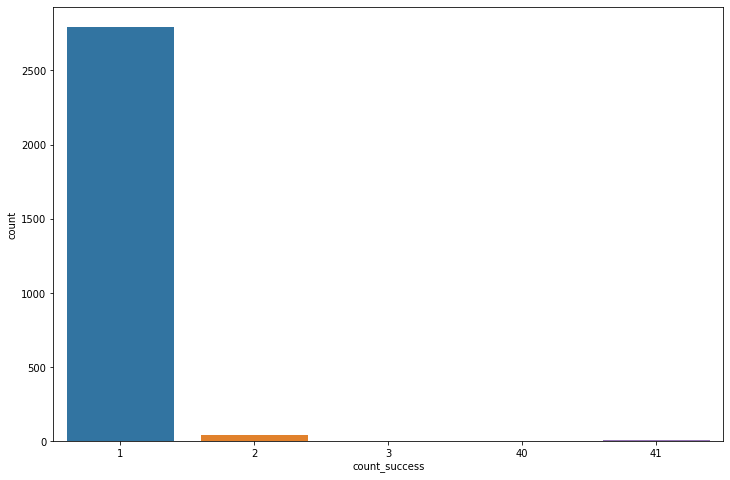

In [63]:
plt.figure(figsize=(12, 8))
sns.countplot(x = ser)


## Шаг 10

Копнем глубже и узнаем, **клиенты какого возраста дали наибольшее количество успешных ответов на компьютере?** Визуализируйте число успешных ответов, сделанных на платформе `computer`, в зависимости от возраста. По оси `x` будет идти возраст, по оси `y` – число успешных ответов.

Если из-за размера график получается нечитаемым, можно добавить `plt.figure(figsize=(12, 8))` в начало соответствующей ячейки c кодом построения визуализации

Шаги выполнения:
1. Оставьте только записи об успешных ответах (см.колонку `success`) с платформы компьютер (см.колонку `platform`)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Чтобы отобрать только нужные записи, используйте метод `query()`**, внутри которого напишите строку с двойным условием: значение в колонке `success` равно True и платформа в колонке `platform` - computer.

Как использовать метод? Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
      
Между условиями поставьте логический оператор: `and` (или `&`), если оба условия обязательно должны выполняться. Или оператор `or` (или `|`), если должно выполняться хотя бы одно из условий.
      
Учтите, что оба условия нужно писать в единых кавычках, а каждое условие и названия колонок - без кавычек. Целые числа и булевы значения (True, False) также пишутся без кавычек, а строки - в кавычках (двойных или одинарных - главное, не тех, в которые взяты оба условия)
      
Помните, что один знак равно означает присвоение, а два - проверку на равенство.
      
</p>
</details>

In [69]:
df5 = df.query('success == True and platform == "computer"')



In [70]:
df5

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,1585466349
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079


2. С помощью функции `sns.countplot()` постройте график числа успешных ответов в зависимости от возраста. По оси `x` будет идти возраст, по оси `y` – число успешных ответов.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Передайте в функцию `sns.countplot()` следующие параметры:  
      `data` — название датафрейма, в котором остались только записи об успешных ответах с платформы компьютер  
      `x` — название колонки с возрастом
      
Например:      
```python
sns.countplot(data = df, x = 'col_1')
```
нарисует график на основе данных из датафрейма `df`, где по оси х будут идти значения из колонки `col_1`.
      
**Функция сама посчитает, сколько ответов дали клиенты каждого возраста. Агрегировать данные не нужно**
</p>
</details>

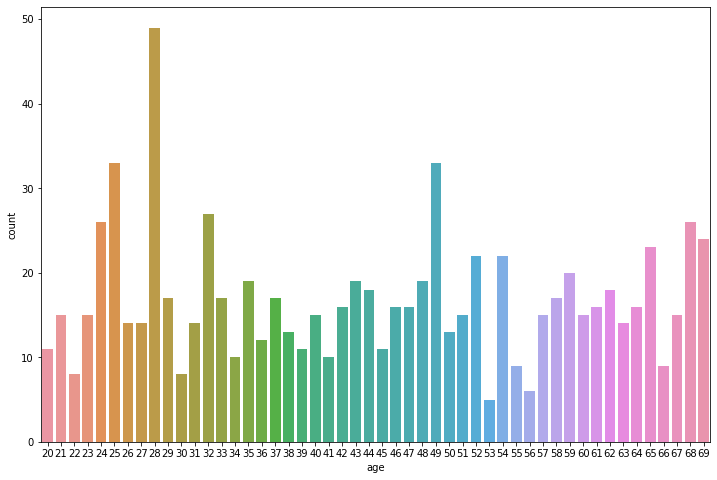

In [72]:
plt.figure(figsize=(12, 8))
sns.countplot(data = df5, x = 'age')



3. Определите, клиенты какого возраста дали наибольшее количество успешных ответов на компьютере. Для этого найдите значение на оси х для самого высокого столбца на графике. Чтобы можно было прочитать график, добавьте строку кода `plt.figure(figsize=(12, 8))` в начало ячейки c кодом построения графика

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Скопируйте строку кода `plt.figure(figsize=(12, 8))` в начало ячейки, а дальше в этой же ячейке постройте график с помощью функции `sns.countplot()` по алгоритму, описанному выше.
</p>
</details>

In [ ]:
# Ваш код здесь



## Итоги

Итак, вы собрали ту аналитику, которая на данном этапе требовалась команде геймдев-стартапа для принятия решения о векторе развития продукта. В процессе вы отработали навыки объединения данных и изменения их формы, а также построения графиков и принятия решений на основе визуализации.